In [3]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 1.3 MB/s eta 0:00:03
     ----- ---------------------------------- 0.4/3.0 MB 3.6 MB/s eta 0:00:01
     ----------- ---------------------------- 0.9/3.0 MB 5.6 MB/s eta 0:00:01
     ------------------- -------------------- 1.5/3.0 MB 7.2 MB/s eta 0:00:01
     --------------------------------- ------ 2.4/3.0 MB 9.7 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 9.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/73.5 kB ? et

In [5]:
import pandas as pd
import yfinance as yf
import datetime


In [7]:
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
data = yf.download('MSFT', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", 
             "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3438,2024-06-24,449.799988,452.750000,446.410004,447.670013,447.670013,15913700
3439,2024-06-25,448.250000,451.420013,446.750000,450.950012,450.950012,16747500
3440,2024-06-26,449.000000,453.600006,448.190002,452.160004,452.160004,16507000
3441,2024-06-27,452.179993,456.170013,451.769989,452.850006,452.850006,14806300
3442,2024-06-28,453.070007,455.380005,446.410004,446.950012,446.950012,28333300


C:\Users\aryan\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



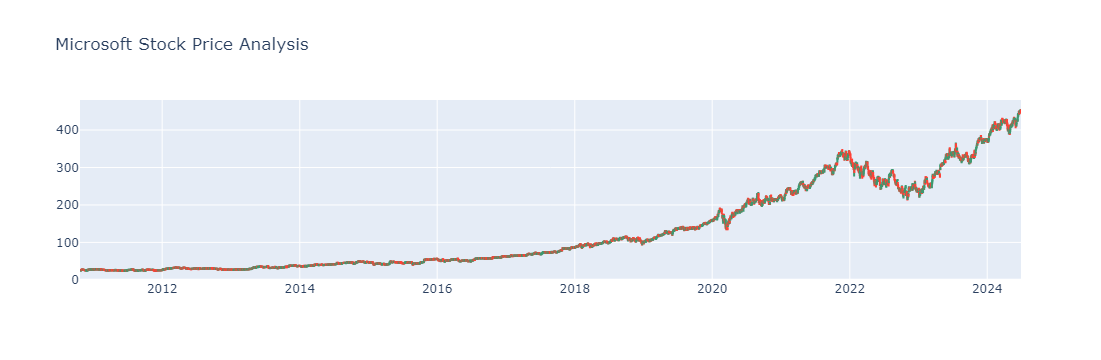

In [13]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Microsoft Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [15]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    0.999942
Low          0.999909
High         0.999897
Open         0.999795
Date         0.914677
Volume      -0.325930
Name: Close, dtype: float64


In [27]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
xtrain.shape

(2754, 4)

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

C:\Users\aryan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 4, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=30)

Epoch 1/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 8380.6602
Epoch 2/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 141.9586
Epoch 3/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 95.3158
Epoch 4/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 69.7332
Epoch 5/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 68.1690
Epoch 6/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 120.3246
Epoch 7/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 81.4524
Epoch 8/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 63.0067
Epoch 9/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 73.0282
Epoch 10/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 61.6418
Epoch 11/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 78.7637
Epoch 12/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 74.0516
Epoch 13/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 87.9118
Epoch 14/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 89.72

In [25]:
import numpy as np
features = np.array([[453.07, 455.38, 446.41, 18998728]])
model.predict(features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[406.49728]], dtype=float32)